**Deep Learning with Python, TensorFlow, and Keras tutorial**

In [1]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
print(len(x_train))
print(x_train[0])

60000
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 

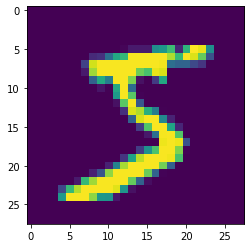

In [4]:
plt.imshow(x_train[0])

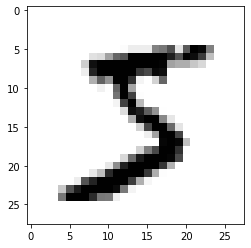

In [5]:
plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()

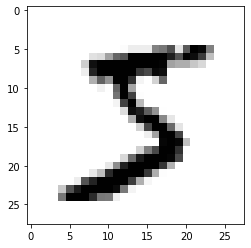

In [6]:
plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()

In [7]:
# once we have data , we normalize the data
# the data in pixel is 0 - 255
# now need to normalize

x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

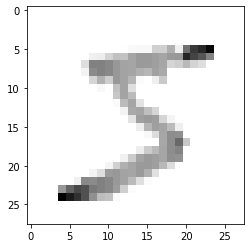

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [9]:
#After normalization the next thing we do is  to build a odel

model = tf.keras.models.Sequential()
# input layer
model.add(tf.keras.layers.Flatten())  
#1st hidedn layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
#2nd hidden layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
# output layer
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

# paramets for training of model

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
#train the model by defining the epochs
model.fit(x_train,y_train,epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 20s 9ms/step - loss: 0.2626 - accuracy: 0.9234 1s -
Epoch 2/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1078 - accuracy: 0.9665
Epoch 3/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0736 - accuracy: 0.9771


In [10]:
# neural networks are good at overfitting .The questionis whether they have
# overfitted??

val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1028 - accuracy: 0.9694
0.10277798026800156 0.9693999886512756


In [11]:
# saving  the model
model.save('epic_num_reader.model')
# Loading the model
new_model = tf.keras.models.load_model('epic_num_reader.model')
# predict with the loaded model.prediction should be passed within list
predictions =  new_model.predict([x_test])
print(predictions)

INFO:tensorflow:Assets written to: epic_num_reader.model\assets
[[9.9218994e-11 4.3713019e-08 1.7691455e-05 ... 9.9988723e-01
  3.2750094e-08 2.0110444e-07]
 [4.5116849e-06 4.7395620e-04 9.9921346e-01 ... 8.1390588e-08
  1.0838324e-06 6.4888817e-10]
 [1.5945415e-07 9.9959844e-01 6.4660780e-05 ... 2.6038944e-04
  1.1969074e-05 5.9316488e-07]
 ...
 [8.9785832e-11 4.6702868e-07 2.2559998e-08 ... 6.6005545e-05
  2.6063816e-07 2.4230127e-05]
 [8.2568267e-06 2.9188345e-06 2.0592191e-07 ... 6.4884611e-05
  2.6997665e-04 1.6878471e-06]
 [8.9299661e-08 7.9341556e-10 2.1200213e-08 ... 9.5524274e-12
  1.4785061e-09 6.8497613e-10]]


In [12]:
# The above output is not interpretable
# so use numpy

import numpy as np
print(np.argmax(predictions[0]))

7


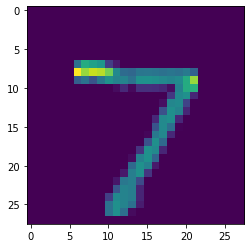

In [13]:
plt.imshow(x_test[0])
plt.show()

**Loading in your own data - Deep Learning basics with Python, TensorFlow and Keras p.2**

In [14]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as  np
import matplotlib.pyplot as plt
import os
import cv2

In [17]:
DATADIR = "C:/Users/kiran/Desktop/Bhaskar/DataScience_Projects/ml_projects/SX/PetImages"

In [18]:
CATEGORIES = ["Dog","Cat"]

In [19]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    print(path)

C:/Users/kiran/Desktop/Bhaskar/DataScience_Projects/ml_projects/SX/PetImages\Dog
C:/Users/kiran/Desktop/Bhaskar/DataScience_Projects/ml_projects/SX/PetImages\Cat


In [20]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)# pa
    for img in os.listdir(path):
        print(img)
        #img_array = cv2.imrread(os.path.join(path,img),cv2.IMREAD_GRAYS)

0.jpg
1.jpg
10.jpg
100.jpg
1000.jpg
10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg
1001.jpg
10010.jpg
10011.jpg
10012.jpg
10013.jpg
10014.jpg
10015.jpg
10016.jpg
10017.jpg
10018.jpg
10019.jpg
1002.jpg
10020.jpg
10021.jpg
10022.jpg
10023.jpg
10024.jpg
10025.jpg
10026.jpg
10027.jpg
10028.jpg
10029.jpg
1003.jpg
10030.jpg
10031.jpg
10032.jpg
10033.jpg
10034.jpg
10035.jpg
10036.jpg
10037.jpg
10038.jpg
10039.jpg
1004.jpg
10040.jpg
10041.jpg
10042.jpg
10043.jpg
10044.jpg
10045.jpg
10046.jpg
10047.jpg
10048.jpg
10049.jpg
1005.jpg
10050.jpg
10051.jpg
10052.jpg
10053.jpg
10054.jpg
10055.jpg
10056.jpg
10057.jpg
10058.jpg
10059.jpg
1006.jpg
10060.jpg
10061.jpg
10062.jpg
10063.jpg
10064.jpg
10065.jpg
10066.jpg
10067.jpg
10068.jpg
10069.jpg
1007.jpg
10070.jpg
10071.jpg
10072.jpg
10073.jpg
10074.jpg
10075.jpg
10076.jpg
10077.jpg
10078.jpg
10079.jpg
1008.jpg
10080.jpg
10081.jpg
10082.jpg
10083.jpg
10084.jpg
10085.jpg
10086.jpg
10087.jpg
10088.jpg
10

In [21]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)# path to cats and dogs dir
    for img in os.listdir(path):
        # convert images into aray ang grey scale gray scale from the path
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        print(img_array)
        break

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]
[[167 167 168 ... 204 203 202]
 [167 167 168 ... 204 203 203]
 [167 167 168 ... 205 204 203]
 ...
 [124 124 124 ...   2   2   2]
 [123 123 123 ...   1   1   1]
 [122 122 123 ...   1   1   1]]


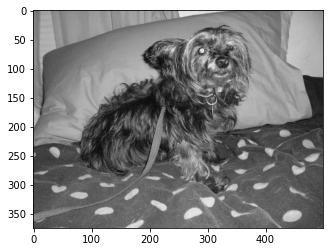

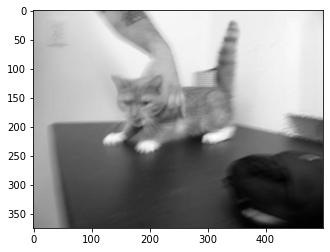

In [23]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)# path to cats and dogs dir
    for img in os.listdir(path):
        # convert images into aray ang grey scale gray scale from the path
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap = 'gray')
        plt.show()
        break


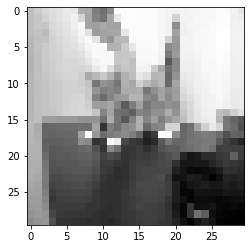

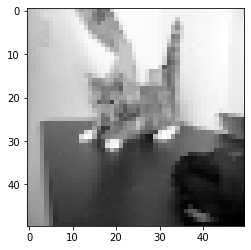

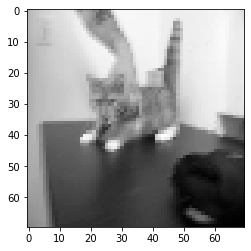

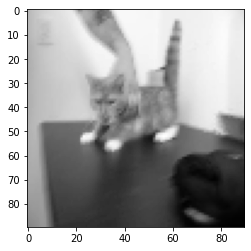

In [29]:
 # making every image as same shape and size for different sizes
IMG_SIZE = [30,50,70,90]
for i in IMG_SIZE:
    new_array = cv2.resize(img_array,(i,i))
    plt.imshow(new_array,cmap = 'gray')
    plt.show()

In [33]:
training_data = []
iMG_SIZE = 50

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)# path to cats and dogs dir
        #mapping the dat to their respective classes(numerical classes rather than string)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                # convert images into aray ang grey scale gray scale from the path
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(iMG_SIZE,iMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            

create_training_data()

    

In [34]:
print(len(training_data))

24946


In [36]:
training_data[0]

[array([[115, 160, 159, ..., 157, 148, 139],
        [121, 164, 166, ..., 163, 153, 146],
        [124, 161, 164, ..., 168, 161, 151],
        ...,
        [155, 128,  88, ...,  81,  69,  68],
        [ 87,  95,  72, ...,  77,  74,  73],
        [ 75,  78,  79, ...,  75,  78,  75]], dtype=uint8),
 0]

In [41]:
import random
random.shuffle(training_data)

In [39]:
for sample in training_data[:10]:
    print(sample[0])

[[  3   0   4 ...  50  55  46]
 [  2   2   1 ...  55  51  56]
 [  0   3   0 ...  59  51  47]
 ...
 [153 147 160 ...  59  50  56]
 [165 168 159 ...  66  53  62]
 [184 164 149 ...  63  66  59]]
[[ 4  4  4 ...  3  5 28]
 [ 4  5  4 ... 11  3 43]
 [ 6  3  4 ... 48  4 10]
 ...
 [75 71 69 ... 18 21 23]
 [65 72 99 ... 20 18 21]
 [68 62 85 ... 19 17 52]]
[[211 209 212 ...  56  16  32]
 [213 213 214 ...  53  22  25]
 [216 216 215 ...  28  20  37]
 ...
 [192 194 191 ...  36  35  38]
 [189 192 194 ...  35  34  34]
 [176 191 196 ...  34  33  32]]
[[100 126  46 ... 129 130 138]
 [124  96  44 ... 111  99 145]
 [101 139  55 ... 119 124 124]
 ...
 [128 137 135 ... 110 135 136]
 [134 129 126 ... 131 152 136]
 [116 126 127 ... 129 138 131]]
[[ 60  60  61 ...  74  57  71]
 [ 55  50  57 ...  49  47  55]
 [ 39  47  41 ...  63  77  47]
 ...
 [166 168 147 ...  33  25  38]
 [175 181 163 ...  41  29  31]
 [151 127 147 ...  29  32  27]]
[[242 243 243 ... 242 242 242]
 [242 243 243 ... 242 242 242]
 [243 243 242 

In [42]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
0
1
0
1
1
1


In [43]:
X = []
y = []

In [44]:
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,iMG_SIZE,iMG_SIZE,1)

In [45]:
X

array([[[[ 52],
         [ 41],
         [ 49],
         ...,
         [247],
         [ 14],
         [ 77]],

        [[ 33],
         [ 48],
         [ 41],
         ...,
         [ 90],
         [ 37],
         [ 41]],

        [[ 60],
         [ 69],
         [ 92],
         ...,
         [ 90],
         [ 78],
         [ 11]],

        ...,

        [[161],
         [ 66],
         [ 73],
         ...,
         [ 77],
         [ 74],
         [ 98]],

        [[170],
         [138],
         [ 95],
         ...,
         [ 96],
         [104],
         [101]],

        [[142],
         [151],
         [140],
         ...,
         [103],
         [102],
         [ 99]]],


       [[[ 26],
         [ 32],
         [ 77],
         ...,
         [148],
         [143],
         [137]],

        [[ 26],
         [ 29],
         [ 46],
         ...,
         [133],
         [120],
         [ 94]],

        [[ 30],
         [ 24],
         [ 27],
         ...,
         [ 87],
         [

In [46]:
y

[0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,


In [47]:
# You dont have to doa ll this stuff all oer again .So save the model
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out =open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()



In [49]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [50]:
X[1]

array([[[ 26],
        [ 32],
        [ 77],
        ...,
        [148],
        [143],
        [137]],

       [[ 26],
        [ 29],
        [ 46],
        ...,
        [133],
        [120],
        [ 94]],

       [[ 30],
        [ 24],
        [ 27],
        ...,
        [ 87],
        [ 65],
        [ 74]],

       ...,

       [[ 79],
        [ 87],
        [ 97],
        ...,
        [143],
        [179],
        [183]],

       [[105],
        [108],
        [113],
        ...,
        [134],
        [173],
        [189]],

       [[113],
        [113],
        [112],
        ...,
        [169],
        [174],
        [126]]], dtype=uint8)

**Convolutional Neural Networks - Deep Learning basics with Python, TensorFlow and Keras p.3**

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import pickle

In [53]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

In [54]:
X

array([[[[ 52],
         [ 41],
         [ 49],
         ...,
         [247],
         [ 14],
         [ 77]],

        [[ 33],
         [ 48],
         [ 41],
         ...,
         [ 90],
         [ 37],
         [ 41]],

        [[ 60],
         [ 69],
         [ 92],
         ...,
         [ 90],
         [ 78],
         [ 11]],

        ...,

        [[161],
         [ 66],
         [ 73],
         ...,
         [ 77],
         [ 74],
         [ 98]],

        [[170],
         [138],
         [ 95],
         ...,
         [ 96],
         [104],
         [101]],

        [[142],
         [151],
         [140],
         ...,
         [103],
         [102],
         [ 99]]],


       [[[ 26],
         [ 32],
         [ 77],
         ...,
         [148],
         [143],
         [137]],

        [[ 26],
         [ 29],
         [ 46],
         ...,
         [133],
         [120],
         [ 94]],

        [[ 30],
         [ 24],
         [ 27],
         ...,
         [ 87],
         [

In [83]:
y

[0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,


In [84]:
type(y)

list

In [85]:
y = np.array(y)

In [86]:
type(y)

numpy.ndarray

In [87]:
y

array([0, 1, 1, ..., 0, 1, 1])

In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import pickle
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))
X = X/255
y = np.array(y)
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ['accuracy']
             )
model.fit(X,y,batch_size = 32,epochs = 3 ,validation_split = 0.1)









Epoch 1/3
702/702 [==============================] - 308s 436ms/step - loss: 0.6119 - accuracy: 0.6563 - val_loss: 0.5425 - val_accuracy: 0.7259
Epoch 2/3
702/702 [==============================] - 235s 335ms/step - loss: 0.5091 - accuracy: 0.7491 - val_loss: 0.4982 - val_accuracy: 0.7695
Epoch 3/3
702/702 [==============================] - 214s 306ms/step - loss: 0.4646 - accuracy: 0.7795 - val_loss: 0.5509 - val_accuracy: 0.7263


**tensorboard visualize training process**

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time
import pickle

# give the name to model
NAME = "Cats-vs-dog-cnn-64x2-{}".format(int(time.time()))

#logs of tensorboard
tensorboard = tf.keras.callbacks.TensorBoard(log_dir = 'logs/{}'.format(NAME))

#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.333)
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
#tf.compat.v1.Session()
#sess = tf.Session(config = tf.ConfigProto(gpu_options=gpu_options))
sess = tf.compat.v1.Session(config = tf.compat.v1.ConfigProto(gpu_options=gpu_options))
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255
y = np.array(y)
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ['accuracy']
             )
model.fit(X,y,batch_size = 32,epochs = 10 ,validation_split = 0.1,callbacks = [tensorboard])


Epoch 1/10
702/702 [==============================] - 292s 413ms/step - loss: 0.6064 - accuracy: 0.6595 - val_loss: 0.5576 - val_accuracy: 0.7114
Epoch 2/10
702/702 [==============================] - 225s 320ms/step - loss: 0.5062 - accuracy: 0.7535 - val_loss: 0.4843 - val_accuracy: 0.7723
Epoch 3/10
702/702 [==============================] - 351s 500ms/step - loss: 0.4537 - accuracy: 0.7860 - val_loss: 0.4772 - val_accuracy: 0.7583
Epoch 4/10
702/702 [==============================] - 285s 407ms/step - loss: 0.4165 - accuracy: 0.8087 - val_loss: 0.4494 - val_accuracy: 0.7952
Epoch 5/10
702/702 [==============================] - 291s 415ms/step - loss: 0.3784 - accuracy: 0.8290 - val_loss: 0.4424 - val_accuracy: 0.7972
Epoch 6/10
702/702 [==============================] - 284s 405ms/step - loss: 0.3429 - accuracy: 0.8454 - val_loss: 0.4447 - val_accuracy: 0.7968
Epoch 7/10
702/702 [==============================] - 250s 356ms/step - loss: 0.3043 - accuracy: 0.8695 - val_loss: 0.4568 -

***Run the following command in anaconda propt to get the visualiation of tensor board***
##python -m tensorboard.main --logdir=logs/


***paste the link in windows browser***
##http://localhost:6006/

In [102]:
time.time()

1645099445.863887

In [103]:
time.time()

1645099499.6233509

**Optimizing with TensorBoard - Deep Learning w/ Python, TensorFlow & Keras p.5**

In [110]:
import time
dense_layers = [0,1,2]
layer_sizes = [32,64,128]
conv_layers = [1,2,3]

for dense_layer in dense_layers:
    for layer_size in layers_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer,layer_size,dense_layer,int(time.time())
                            
            
            

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_8908/2745722459.py, line 12)

In [118]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time
import pickle
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.333)
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
#tf.compat.v1.Session()
#sess = tf.Session(config = tf.ConfigProto(gpu_options=gpu_options))
sess = tf.compat.v1.Session(config = tf.compat.v1.ConfigProto(gpu_options=gpu_options))
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255
y = np.array(y)

import time
dense_layers = [0,1,2]
layer_sizes = [32,64,128]
conv_layers = [1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer,layer_size,dense_layer,int(time.time()))
            tensorboard = tf.keras.callbacks.TensorBoard(log_dir ='C:/Users/kiran/Desktop/Bhaskar/DataScience_Projects/ml_projects/SX/PetImages/logs/{}'.format(NAME))
            model = Sequential()
            model.add(Conv2D(layer_size,(3,3),input_shape = X.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size = (2,2)))
                                                         
            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size,(3,3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size = (2,2)))

            model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss = "binary_crossentropy",
                         optimizer = "adam",
                         metrics = ['accuracy']
                         )
            model.fit(X,y,batch_size = 32,epochs = 10 ,validation_split = 0.1,callbacks = [tensorboard])

Epoch 1/10
702/702 [==============================] - 60s 84ms/step - loss: 0.6191 - accuracy: 0.6544 - val_loss: 0.5786 - val_accuracy: 0.6950
Epoch 2/10
702/702 [==============================] - 58s 83ms/step - loss: 0.5438 - accuracy: 0.7308 - val_loss: 0.5489 - val_accuracy: 0.7255
Epoch 3/10
702/702 [==============================] - 63s 90ms/step - loss: 0.5114 - accuracy: 0.7531 - val_loss: 0.5364 - val_accuracy: 0.7431
Epoch 4/10
702/702 [==============================] - 59s 83ms/step - loss: 0.4930 - accuracy: 0.7695 - val_loss: 0.5572 - val_accuracy: 0.7142
Epoch 5/10
702/702 [==============================] - 60s 86ms/step - loss: 0.4791 - accuracy: 0.7744 - val_loss: 0.5372 - val_accuracy: 0.7355
Epoch 6/10
702/702 [==============================] - 62s 88ms/step - loss: 0.4649 - accuracy: 0.7842 - val_loss: 0.5389 - val_accuracy: 0.7283
Epoch 7/10
702/702 [==============================] - 66s 93ms/step - loss: 0.4587 - accuracy: 0.7843 - val_loss: 0.5234 - val_accuracy:

KeyboardInterrupt: 

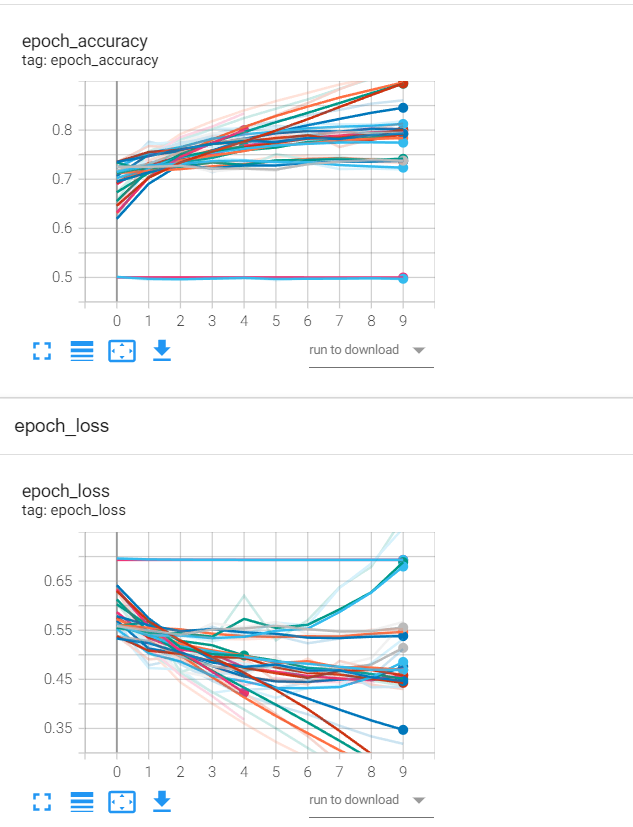

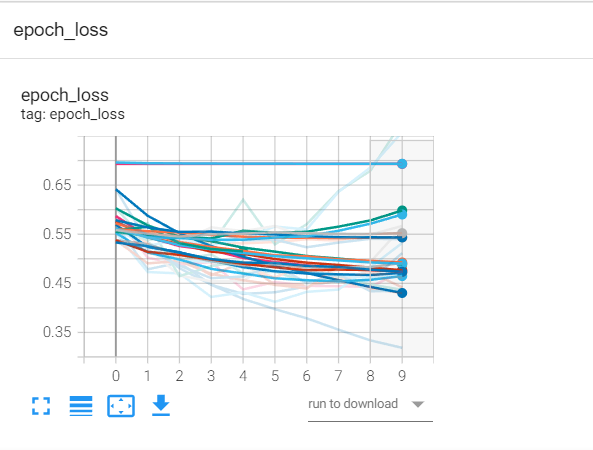

*How to use your trained model - Deep Learning basics with Python, TensorFlow and Keras p.6:*

In [3]:
import cv2
import tensorflow as tf
categories = ["Dog","Cat"]
# Defining a path and preprocessing new images which are to be tested are present
def prepare(filepath):
    IMG_SIZE = 70
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)

model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('dog.jpg')])

print(prediction)


prediction = model.predict([prepare('dog.jpg')])
print(categories[int(prediction[0][0])])

prediction = model.predict([prepare('cat.jpg')])
print(categories[int(prediction[0][0])])


